In [1]:
import pandas as pd
import matplotlib.pyplot as mplot
#mplot.switch_backend("TKAgg")

In [2]:
data = pd.read_csv('dataset/crypto.csv')

## 1. Visualisasi Data

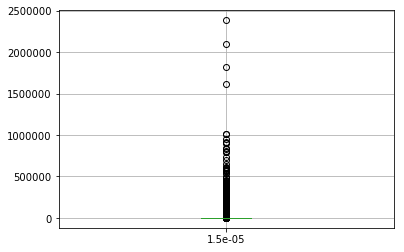

In [3]:
data.boxplot()
mplot.show()

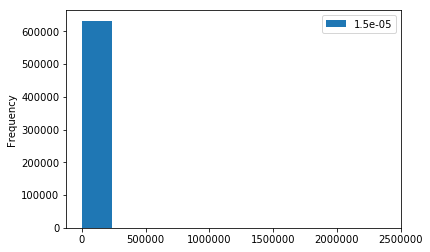

In [4]:
data.plot(kind = 'hist')
mplot.show()

## 2. Statistical Description

Minimum value

In [9]:
data.min()

1.5e-05    2.925000e-09
dtype: float64

Maximum value

In [6]:
data.max()

1.5e-05    2383502.5
dtype: float64

Mode value

In [7]:
data.mode()

1.5e-05
0  0.000002

Median value

In [10]:
data.median()

1.5e-05    0.009734
dtype: float64

Variance value

In [11]:
data.var()

1.5e-05    7.532053e+07
dtype: float64

Standard deviasi

In [13]:
data.std()

1.5e-05    8678.740363
dtype: float64

Skewness

In [15]:
data.skew()

1.5e-05    118.239514
dtype: float64

Kurtosis

In [16]:
data.kurtosis()

1.5e-05    22297.435591
dtype: float64

## 3. Fungsi Distribusi

Dibawah ini adalah algoritma untuk mencocokkan berbagai distribusi. Pertama, dituliskan
dulu berbagai distribusi yang akan dicocokkan. Yang dipakai adalah yang diajarkan di kelas dan
terdapat pada buku, yakni 1. norm (distribusi normal) 2. gamma (distribusi gamma) 3. expon
(distribusi eksponensial) 4. chi (distribusi chi-squared) 5. beta (distribusi beta) 6. lognorm (dis-
tribusi lognormal)
Cara kerjanya adalah, untuk setiap distribusi diatas, akan dipanggil method milik object dis-
tribusi tersebut yang bernama fit(), yang fungsinya adalah untuk mencari parameter distribusi
yang paling mendekati data kita.
Setelah didapat parameter yang paling sesuai, akan dihitung selisih antara nilai probabilitas
pada distribusi dengan yang ada pada data kita, untuk setiap nilai data yang bersangkutan. Nilai
tersebut dikuadratkan, dan disimpan dalam variable sse.
Untuk setiap jenis distribusi, kita akan menghitung sse-nya, dan distribusi yang kita pilih
adalah yang memiliki sse terkecil.

In [18]:
import scipy.stats as st
import warnings
import numpy as np

dists = [st.norm, st.gamma, st.expon, """st.chi, st.beta, st.lognorm"""]
y, x = np.histogram(data, bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
distribution = st.norm
params = (0.0, 1.0)
best_sse = np.inf
for dist in dists:
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            par = dist.fit(data)
            arg = par[:-2]
            loc = par[-2]
            scale = par[-1]
            pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))
            if (best_sse > sse) & (sse > 0):
                distribution = dist
            params = par
            best_sse = sse
    except Exception:
        pass
print(distribution.name)
print(params)

expon
(2.7632183123389471e-09, 203.01825336646073)


Didapat bahwa yang paling cocok adalah distribusi exponensial, dengan sse terkecil.